# Final Project
# Erick Olguin
# STT 381

The dataset used for this project came from 538's police kiliings dataset:
https://github.com/fivethirtyeight/data/tree/master/police-killings


Article used for the dataset:
https://fivethirtyeight.com/features/where-police-have-killed-americans-in-2015/

## Project Statement: 
The main reason I wanted to use this dataset was to figure out if the old homage is true that young black men are more likely to be killed by the police than any other demographic. This is one of the problems I want to figure out but what I am trying to model is how many people get shot in the us within a given time period of years.

To figure this out I first have to see if the data has any trends that could be useful to calculate that value. Once I understand what the data has then ill be able to figure out what 


In [2]:
#Libraries used for this project
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score

In [3]:
#Head of data set to be used
police_kill = pd.read_csv("killings.csv")
police_kill.head()

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,...,98.8,17194,48295.0,55909,0.863814,3.0,3.0,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785.0,49669,1.384868,5.0,4.0,1.9,0.063550,0.403954


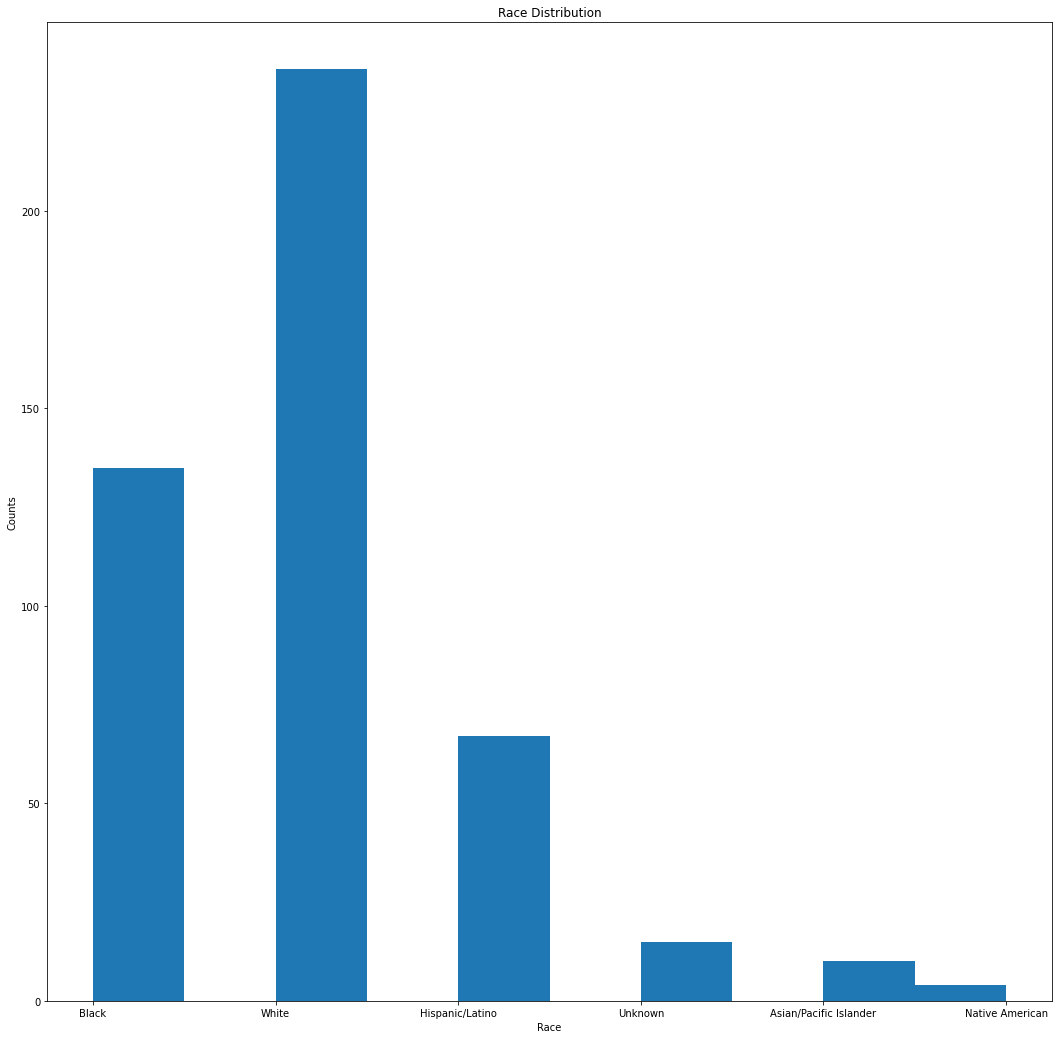

In [4]:
#race distribution of killings
f,ax = plt.subplots(figsize=(18, 18))
plt.hist(police_kill["raceethnicity"],align = 'mid')
plt.title("Race Distribution")
plt.ylabel("Counts")
plt.xlabel("Race");
plt.show()

This graph shows the race of each perosn that was killed by police but I would like to normalize it to get percentage of their race. Using the population of 2015 which was 320 million people and the census that gave us population distribution based on race. The graph below was produced.
https://www.statista.com/statistics/270272/percentage-of-us-population-by-ethnicities/

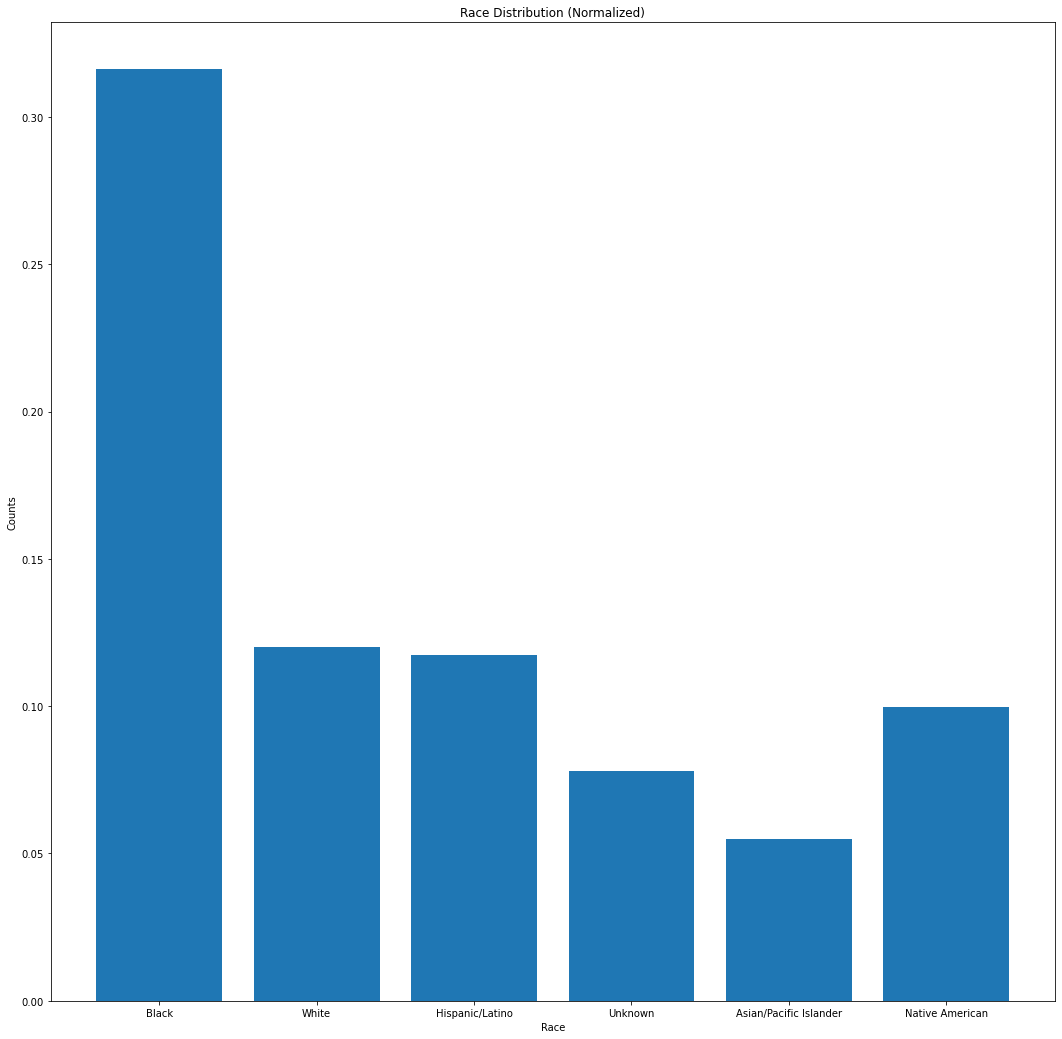

In [5]:
#race distribution of killings normalized
pop_2015 = 320700000
races = police_kill["raceethnicity"].unique()

raceCount = []

for i in races:
    count = police_kill[police_kill["raceethnicity"] == i]
    raceCount.append(len(count))
    
raceAdjusted = (np.array(raceCount)/np.array([.1331*pop_2015,.6127*pop_2015,.1779*pop_2015,.06*pop_2015,.0567*pop_2015,.0125*pop_2015]))*10**5

f,ax = plt.subplots(figsize=(18, 18))

plt.bar(races,raceAdjusted)
plt.title("Race Distribution (Normalized)")
plt.ylabel("Counts")
plt.xlabel("Race");

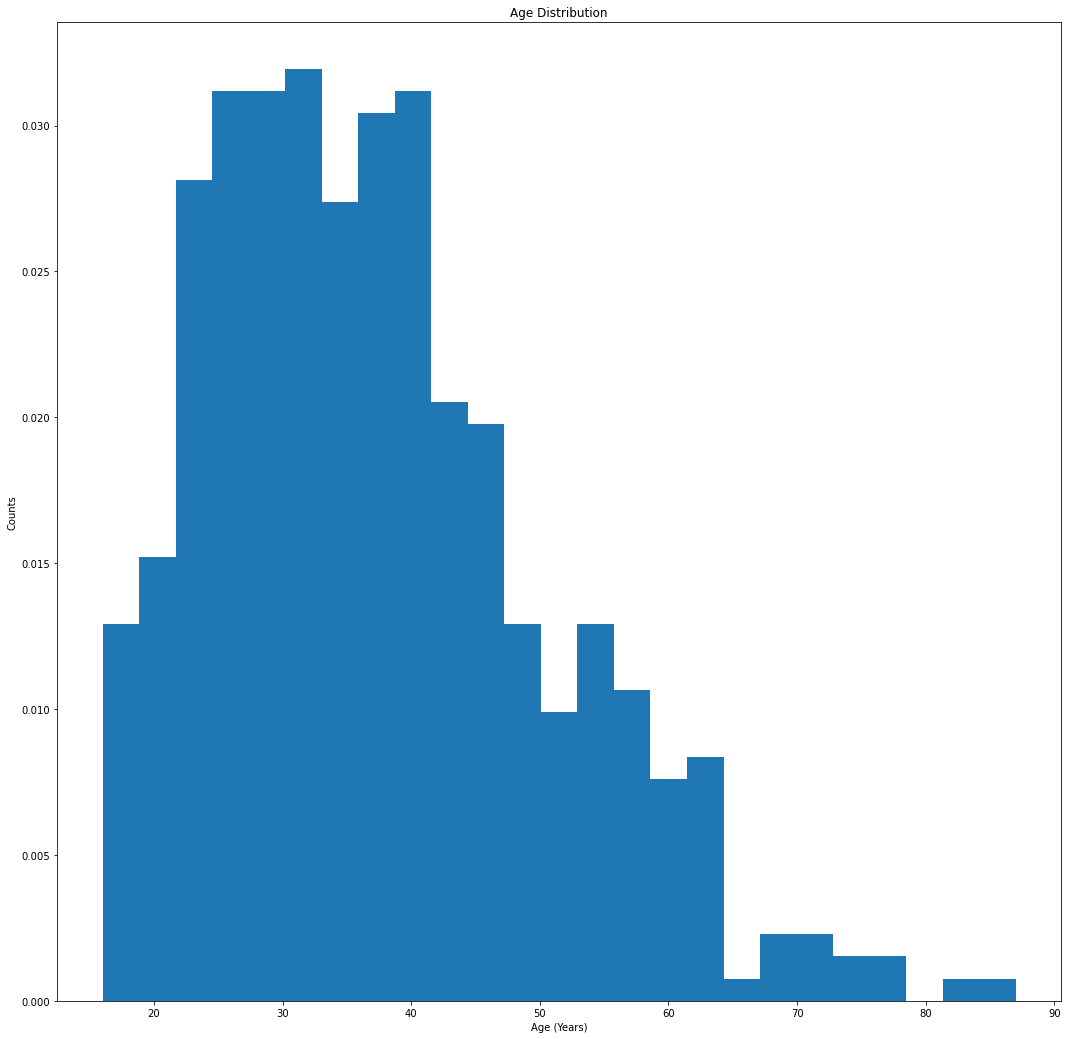

In [6]:
#Household income distibution of killings
f,ax = plt.subplots(figsize = (18,18))
#type(police_kill["raceethnicity"])

police_kill["age"] = pd.to_numeric(police_kill["age"],errors = "coerce")
plt.hist(police_kill["age"],bins = 25,density = True)
plt.title("Age Distribution")
plt.ylabel("Counts")
plt.xlabel("Age (Years)")
plt.show()

#age_counts,age_bins,_=plt.hist(police_kill["age"],bins = 3)
#print(age_counts)
#print(age_bins)

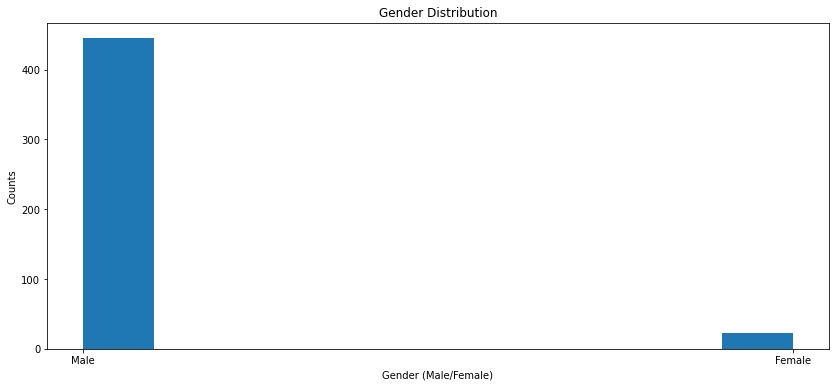

In [7]:
#Gender distribution of killings
f,ax = plt.subplots(figsize = (14,6))

plt.hist(police_kill["gender"])
plt.title("Gender Distribution")
plt.ylabel("Counts")
plt.xlabel("Gender (Male/Female)");

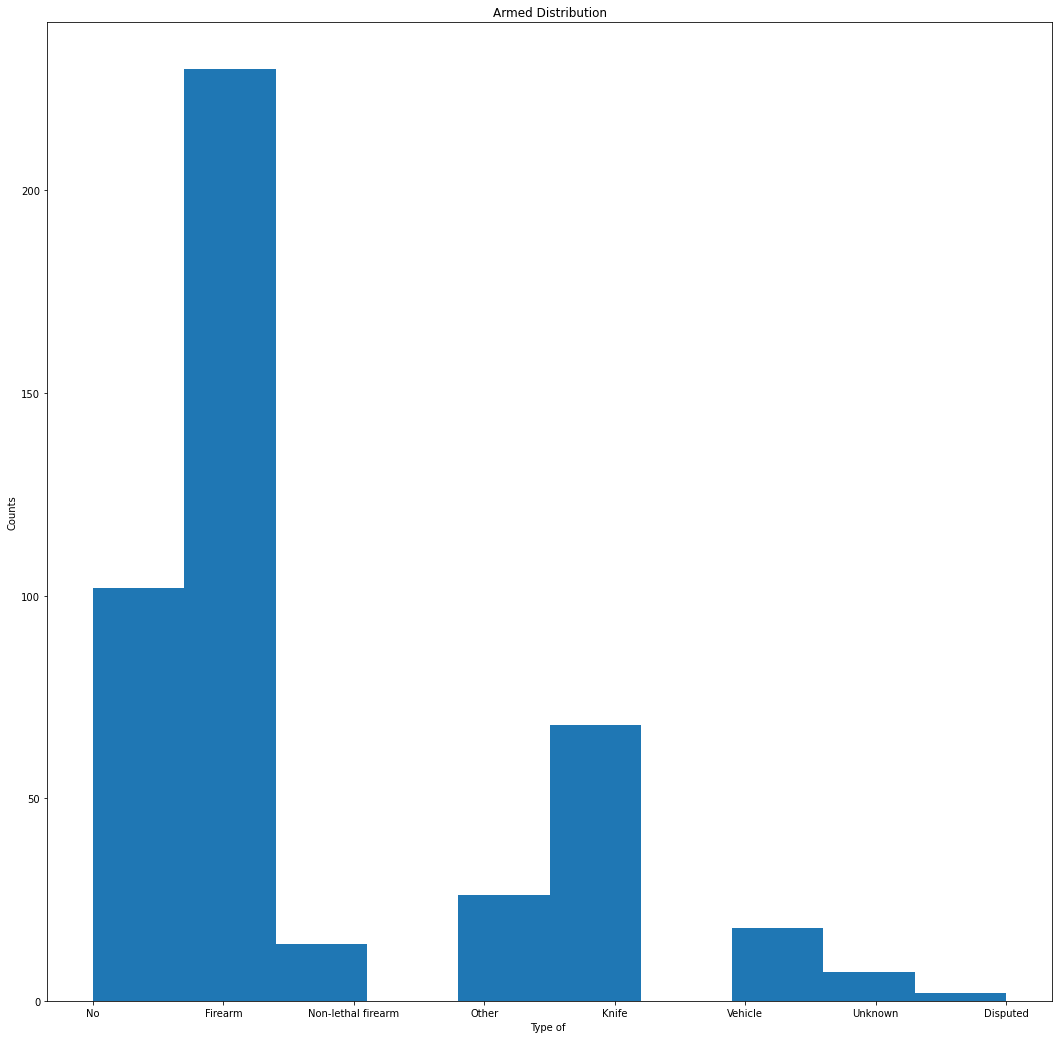

In [8]:
#Armed distribution of killings
f,ax = plt.subplots(figsize = (18,18))

plt.hist(police_kill["armed"])
plt.title("Armed Distribution")
plt.ylabel("Counts")
plt.xlabel("Type of ");
plt.show()

# Repeated data


The article used for this dataset on 538's website came to this conclusion, which I tried to replicate the same trends that they found.

538's Conclusion:

 "One thing that’s clear from the data: Police killings tend to take place in neighborhoods that are poorer and blacker than the U.S. as a whole. About 30 percent of the killings — 139 of the 467 — took place in census tracts that are in the bottom 20 percent nationally in terms of household income.4 A quarter of those killed by police died in tracts with majority-black populations; nationally, just 7 percent of the population lives in majority-black tracts."

 "Black Americans were especially likely to be killed in poorer neighborhoods. Of the 136 African-Americans killed by police who are in the Guardian’s database, 56 — more than 40 percent — died in tracts in the poorest 20 percent nationally. But that may say more about overall racial inequality than about policing per se: African-Americans were killed in low-income areas at roughly the same rate that they live in them."

## About 30 percent of the killings — 139 of the 467 — took place in census tracts that are in the bottom 20 percent nationally in terms of household income
First statement conclusions are shown below

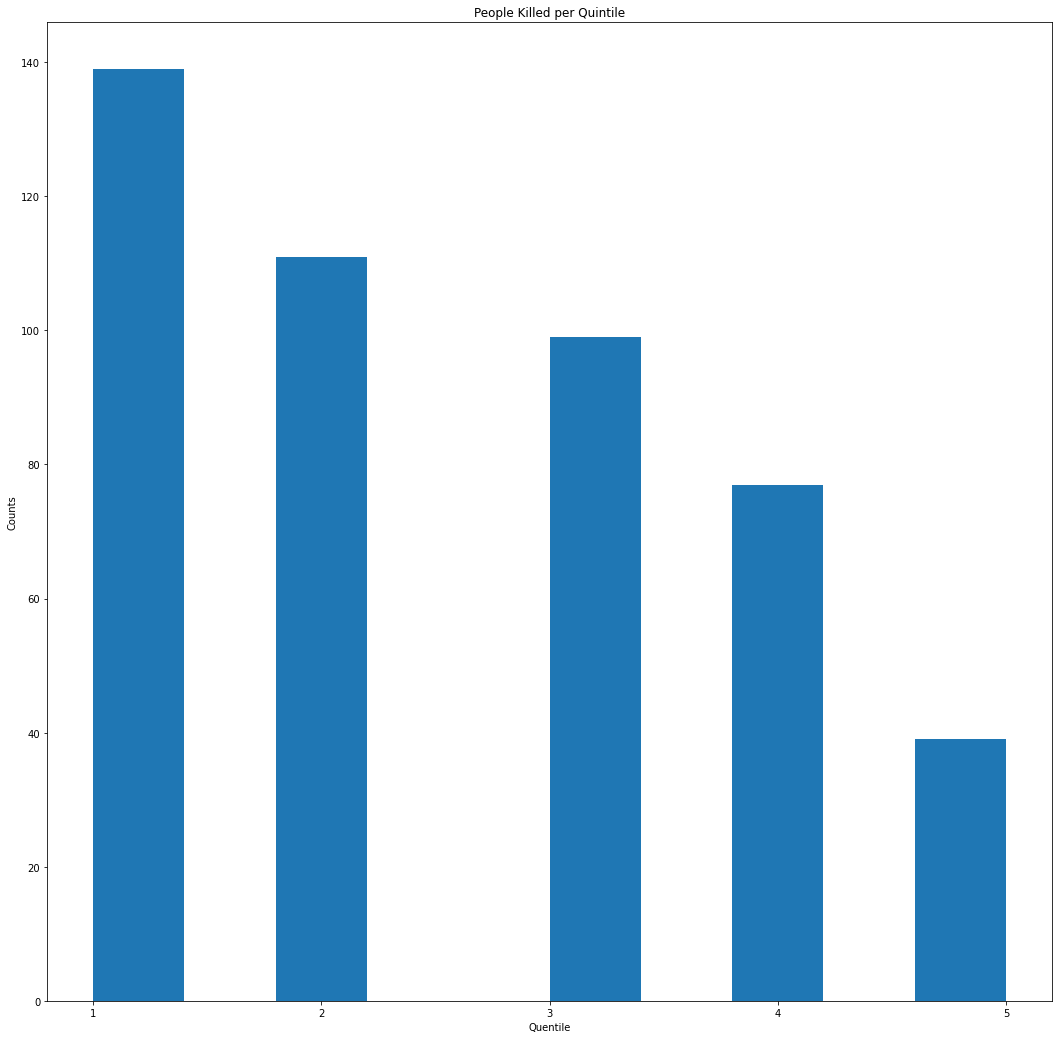

People in the bottom 20% killed: 139
Total people in the dataset killed: 467


In [9]:
f,ax = plt.subplots(figsize = (18,18))

plt.hist(police_kill["nat_bucket"])
plt.title("People Killed per Quintile")
plt.xticks([1,2,3,4,5])
plt.ylabel("Counts")
plt.xlabel("Quentile");
plt.show()

print("People in the bottom 20% killed: " + str(len(police_kill[police_kill["nat_bucket"]==1])))
print("Total people in the dataset killed: " + str(len(police_kill)))

### "A quarter of those killed by police died in tracts with majority-black populations"
I could not get the results to be close to a quarter instead I got 20.7%, so they must be using other data or parameters to get the missing percentage.

[0.20770878 0.79229122]
People killed in majority-black populations: 20.770877944325484


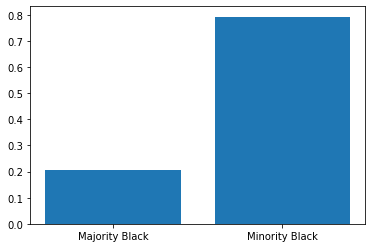

In [10]:
MajorityBlack = 0
MinorityBlack = 0

for i in range(0,len(police_kill)):
    if police_kill["share_black"][i] >= police_kill["share_white"][i] and police_kill["share_black"][i] > police_kill["share_hispanic"][i]:
        MajorityBlack += 1
    else:
        MinorityBlack += 1 

plt.bar(['Majority Black', 'Minority Black'], np.array([MajorityBlack,MinorityBlack])/len(police_kill["share_black"]));
print(np.array([MajorityBlack,MinorityBlack])/len(police_kill["share_black"]))
print("People killed in majority-black populations: " + str(MajorityBlack/len(police_kill["share_black"])*100))

### Of the 136 African-Americans killed by police who are in the Guardian’s database, 56 — more than 40 percent — died in tracts in the poorest 20 percent nationally

This was easily proven with masking techniques

In [11]:
poor_20_per = police_kill[police_kill["nat_bucket"] == 1]
print("People who were killed in poorest 20%: " +str(len(poor_20_per)))

black_group = police_kill[police_kill["raceethnicity"] == "Black"]
print("Black people killed by police: "+str(len(black_group)))

poor_black = black_group[black_group["nat_bucket"] == 1]
print("Black people killed in poorest 20%: "+str(len(poor_black)))
print("Percentage of black people killed in poorest 20%: "+str(len(poor_black)/len(black_group)*100))

People who were killed in poorest 20%: 139
Black people killed by police: 135
Black people killed in poorest 20%: 56
Percentage of black people killed in poorest 20%: 41.48148148148148


# Design own model

The model I want to create is to predict if the person interacting with the police will be killed based on their age, race, and income. Using these three parameters I saw the trends that showed up in the data. With minority, low income young people being targeted the most.
I split up the data to get certain ranges for each parameter, for example age is split into three catagories young, middle age, and old age with the values of each cutoff being decided by the bins in the histogram. For income the same amount of splits will occur with three different types of income, low income, middle income, and high income. Race will be split depending on the uniqueness of the races killed. With that we weight each category to see the liklihood of getting killed and then using that value to average with the three parameters to get a good percentage of getting killed by police.

[16.   33.75 51.5  69.25 87.  ]
[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 0, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 2, 0, 0, 0, 1, 0, 1, 1, 1, 0, 2, 1, 2, 1, 1, 1, 0, 1, 0, 2, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1, 2, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 2, 1, 1, 0, 0, 2, 0, 1, 2, 0, 0, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 0, 1, 2, 0, 0, 2, 2, 2, 2, 1, 0, 1, 1, 2, 1, 1, 0, 0, 1, 2, 2, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 2, 0, 1, 1, 1, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 2, 1, 0, 1, 1, 0, 1, 0, 0, 2, 0, 0, 1, 1, 1, 2, 1, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0, 1, 0, 0, 0, 1, 2, 2, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 2, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 2, 0, 0, 0

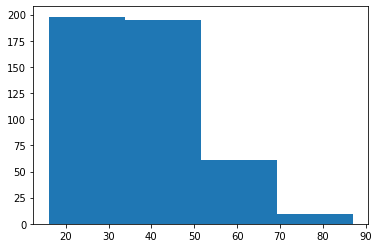

In [23]:
#age brekdown
#0 - young
#1 - middle
#2 - old
count_age,bin_age,_ = plt.hist(police_kill["age"],bins = 4)
age_group = []

#print(bin_age)
for i in police_kill["age"]:
    if i < bin_age[1] or i == bin_age[1]:
        age_group.append(0)
    elif i < bin_age[2] or i == bin_age[2]:
        age_group.append(1)
    elif i < bin_age[3] or i == bin_age[3]:
        age_group.append(2)
#print(age_group)       

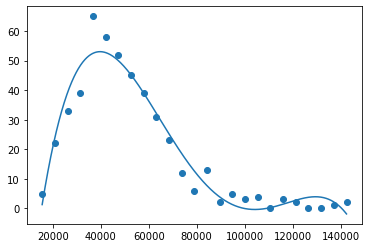

In [125]:
# Income breakdown
#0 - low income
#1 - middle income
#2 - high income
count_income,bin_income,_ = plt.hist(police_kill["h_income"],bins = 4)

IncomeGroup = []

for i in police_kill["h_income"]:
    if i < bin_income[1] or i == bin_income[1]:
        IncomeGroup.append(0)
    elif i > bin_income[1] and i <= bin_income[2]:
         IncomeGroup.append(1)
    elif i > bin_income[2] and i <= bin_income[3]:
        IncomeGroup.append(2)



# Results

# Discussion

Looking at the results in my model I have come to the conclusion that the data set from 2015 is too small to get a national average or predict the amount of people that get killed by police on a yearly basis. To better the model I would need more data points and every instant of people interacting with the police to get a good predictor of people getting killed by police. Since the data is bias with one outcome happening (the police killing the person,) when interacting with the police compared to what actually happens.